<a href="https://colab.research.google.com/github/chrimeade/UCDPA_chrismeade/blob/main/superstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv('SampleSuperstore.csv')
sales_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sales_df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

Checking for all unique entries in each column to see if any can be removed.

In [4]:
unique_col_entries = sales_df.nunique()
print(unique_col_entries)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


As country only has one type, United States, and there is a large number of unique values for postal code, i will delete both of these columns as the information is not required


In [5]:
sales_df.drop(['Country', 'Postal Code'], inplace=True, axis=1)

Confirm columns removal

In [6]:
print(sales_df.columns)

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [16]:
city_count = sales_df['City'].value_counts()
print(city_count)

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64


In [17]:
state_count = sales_df['State'].value_counts()
print(state_count)

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

visuilising sales for each state as there are too many individual cities to show on a chart

In [23]:
import matplotlib.pyplot as plt

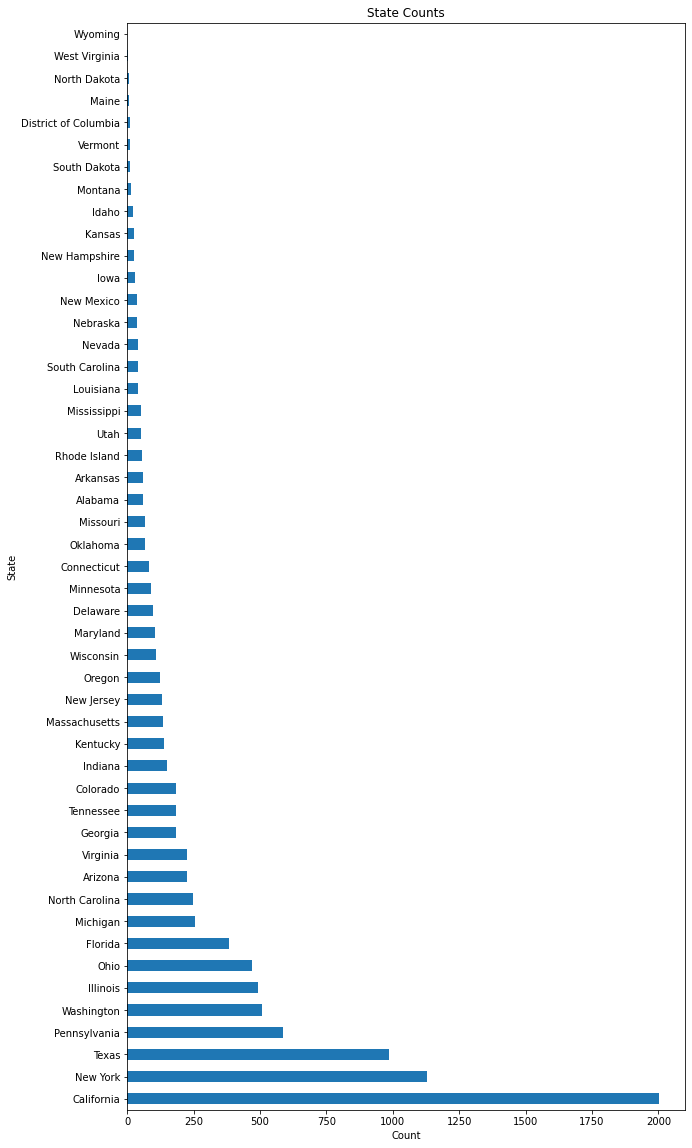

In [24]:
state_count.plot(kind='barh', figsize=(10, 20))

plt.title('State Counts')
plt.xlabel('Count')
plt.ylabel('State')

plt.show()

detail on profit column to see range in profit of each sale

In [27]:
profit_info = sales_df['Profit'].describe()
print(profit_info)

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


I would like to define all sales as "profitable" or "loss leading" as there are quite high variations between the two

In [29]:
neg_profit = sales_df.sort_values('Profit', ascending=False)
print(neg_profit)

           Ship Mode      Segment         City           State   Region  \
6826  Standard Class    Corporate    Lafayette         Indiana  Central   
8153     First Class     Consumer      Seattle      Washington     West   
4190  Standard Class     Consumer       Newark        Delaware     East   
9039  Standard Class     Consumer      Detroit        Michigan  Central   
4098  Standard Class     Consumer  Minneapolis       Minnesota  Central   
...              ...          ...          ...             ...      ...   
4991  Standard Class    Corporate      Chicago        Illinois  Central   
3011  Standard Class  Home Office   Louisville        Colorado     West   
9774  Standard Class     Consumer  San Antonio           Texas  Central   
683         Same Day    Corporate   Burlington  North Carolina    South   
7772  Standard Class     Consumer    Lancaster            Ohio     East   

             Category Sub-Category      Sales  Quantity  Discount     Profit  
6826       Technolog

In [32]:
categorize_profit = lambda x: 'loss leading' if x < 0 else 'profitable'
sales_df['Profit or Loss'] = sales_df['Profit'].apply(categorize_profit)

In [35]:
print(sales_df.head())

        Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

  Profit or Loss  
0     profitable  
1     profitable  
2     profitable  
3   loss leading  
4     profitable  


In [36]:
profitable_count = sales_df['Profit or Loss'].value_counts()
print(profitable_count)

profitable      8123
loss leading    1871
Name: Profit or Loss, dtype: int64
